In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks',
              rc={'axes.facecolor': (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams, colors, cm
import matplotlib.patches as mpatches
rcParams['font.family'] = 'sans-serif'
rcParams['figure.dpi'] = 150

In [2]:
import os
import itertools
import numpy as np
import pandas as pd
from scipy import stats
from pyfish import fish_plot, process_data
# local import
from utils import read_mi
from utils import AFFINITY, ESCAPE, MOI

In [3]:
INTERESTING = set(MOI).union(AFFINITY).union(ESCAPE)

In [4]:
def plot_mi(s, date):
    c = s[s['name'] == date].pivot_table(index='feature_codon_source',
                                         columns='feature_codon_target',
                                         values='outlier',
                                         aggfunc=max)
    
    c = c.reindex(index=sorted(INTERESTING),
                  columns=sorted(INTERESTING))
    
    cmap = plt.get_cmap('crest_r').copy()
    cmap.set_bad('xkcd:light grey')
    
    colors = []
    for x in c.index:
        if x in AFFINITY:
            colors.append('#ef3b2cff')
        elif x in ESCAPE:
            colors.append('#2171b5ff')
        elif x in MOI:
            colors.append('#fec44fff')
        else:
            colors.append('xkcd:grey')
    
    c.index = c.index.astype(int)
    c.columns = c.columns.astype(int)
    
    cm = sns.clustermap(c, cmap=cmap,
                        row_cluster=False, col_cluster=False,
                        row_colors=colors,
                        col_colors=colors,
                        linewidths=0.005,
                        cbar_pos=None,
                        figsize=(7, 7),
                        vmin=1, vmax=4)
    
    cm.ax_heatmap.set_xlabel('spike codon')
    cm.ax_heatmap.set_ylabel('spike codon')
    
    cm.ax_heatmap.set_xticks([x + 0.5 for x in range(c.shape[1])],
                             c.columns,
                             fontsize=13)
    cm.ax_heatmap.set_yticks([x + 0.5 for x in range(c.shape[0])],
                             c.index,
                             fontsize=13)
    
    cm.ax_heatmap.set_title(date, y=1.04)
    
    plt.savefig(f'oldtime_{date}.png',
                dpi=300,
                bbox_inches='tight',
                transparent=True)
    plt.savefig(f'oldtime_{date}.svg',
                dpi=300,
                bbox_inches='tight',
                transparent=True);

In [5]:
df = []
for name in os.listdir('../out/time-subsets/'):
    df.append(read_mi(f'../out/time-subsets/{name}/mi_annotated.tsv.gz',
                      name,
                      date=True))
df = pd.concat(df)

In [6]:
s1 = df[(~df['name'].isin(['2020-02',
                           '2020-03'])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        ((df['feature_codon_source'] == 501) &
         (df['feature_codon_target'] == 498))].copy()

s1 = s1.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[~df['name'].isin(['2020-02',
                                                                            '2020-03'])]['name'].unique()))

In [7]:
s2 = df[(~df['name'].isin(['2020-02',
                           '2020-03'])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        ((df['feature_codon_source'].isin(AFFINITY)) &
         (df['feature_codon_target'].isin(INTERESTING.difference(AFFINITY))))].copy()

s2 = s2.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[~df['name'].isin(['2020-02',
                                                                            '2020-03'])]['name'].unique()))

In [8]:
s3 = df[(~df['name'].isin(['2020-02',
                           '2020-03'])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        ((df['feature_codon_source'].isin(INTERESTING.difference(AFFINITY))) &
         (df['feature_codon_target'].isin(INTERESTING.difference(AFFINITY))))].copy()

s3 = s3.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[~df['name'].isin(['2020-02',
                                                                            '2020-03'])]['name'].unique()))

In [9]:
s = pd.concat([s1, s2])

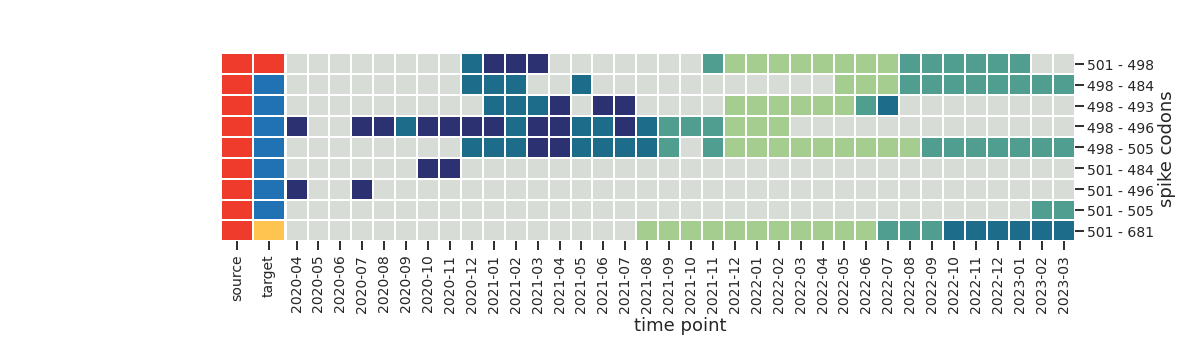

In [10]:
cmap = plt.get_cmap('crest_r').copy()
cmap.set_bad('xkcd:light grey')

colors1 = []
colors2 = []
for x, y in s.index:
    if x in AFFINITY:
        colors1.append('#ef3b2cff')
    elif x in ESCAPE:
        colors1.append('#2171b5ff')
    elif x in MOI:
        colors1.append('#fec44fff')
    else:
        colors1.append('xkcd:grey')

    if y in AFFINITY:
        colors2.append('#ef3b2cff')
    elif y in ESCAPE:
        colors2.append('#2171b5ff')
    elif y in MOI:
        colors2.append('#fec44fff')
    else:
        colors2.append('xkcd:grey')

cm = sns.clustermap(s, cmap=cmap,
                    row_cluster=False, col_cluster=False,
                    row_colors=pd.DataFrame([[a, b] for a, b in zip(colors1, colors2)],
                                            columns=['source', 'target'],
                                            index=s.index),
                    linewidths=0.005,
                    cbar_pos=None,
                    figsize=(17, 5),
                    vmin=1, vmax=4)

cm.ax_heatmap.set_xlabel('time point')
cm.ax_heatmap.set_ylabel('spike codons')

cm.ax_heatmap.set_xticks([x + 0.5 for x in range(s.shape[1])],
                         s.columns,
                         fontsize=14)
cm.ax_heatmap.set_yticks([x + 0.5 for x in range(s.shape[0])],
                         [f'{int(x)} - {int(y)}' for x, y in s.index],
                         fontsize=14)

cm.ax_row_colors.set_xticks([0.5, 1.5],
                            ['source', 'target'],
                            fontsize=14)

plt.savefig('oldtime_8.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('oldtime_8.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [11]:
s = df[(df['gene_source'] == 'S') &
       (df['gene_target'] == 'S') &
       ((df['feature_codon_source'].isin(INTERESTING)) |
        (df['feature_codon_target'].isin(INTERESTING)))].copy()

/home/marco/.local/lib/python3.8/site-packages/seaborn/matrix.py:715: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self._figure = plt.figure(figsize=figsize)


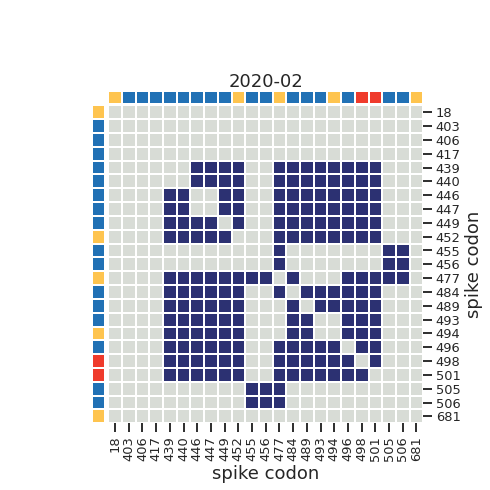

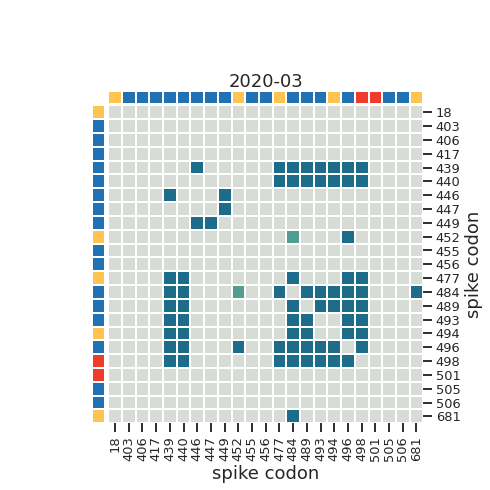

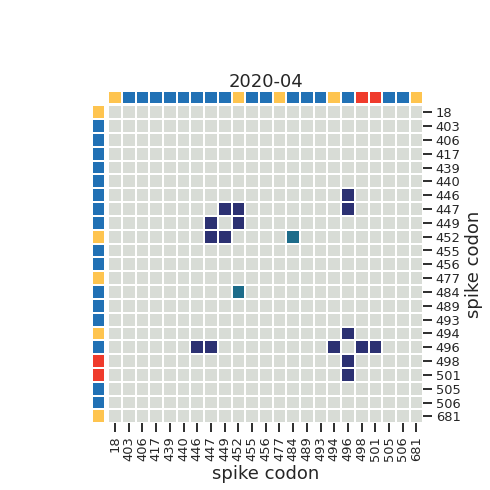

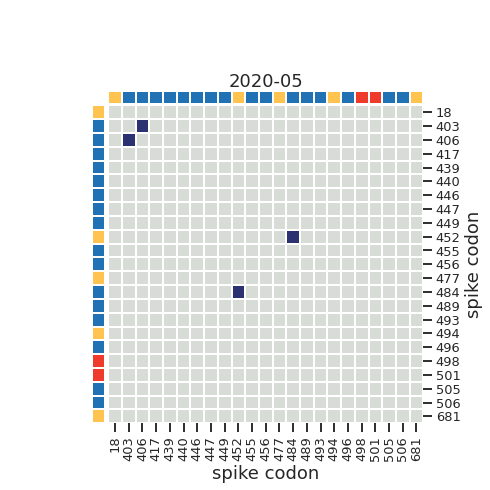

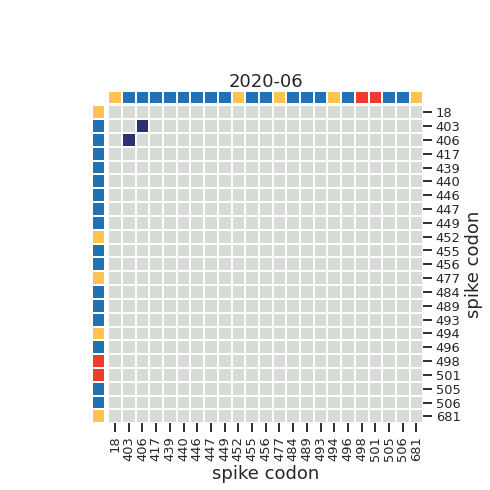

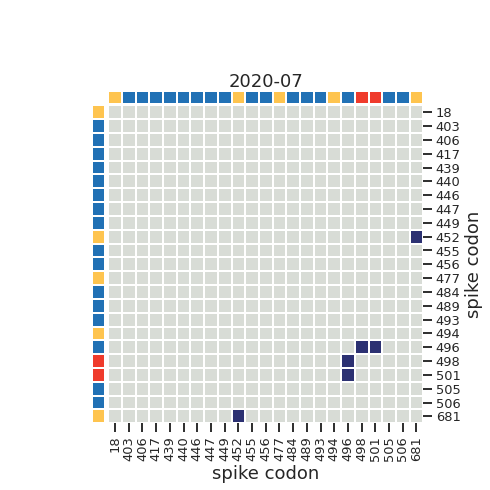

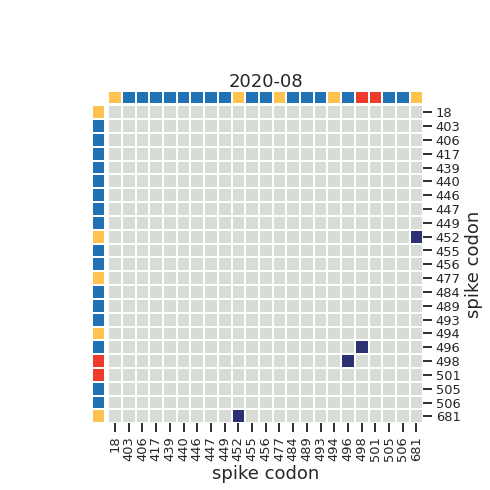

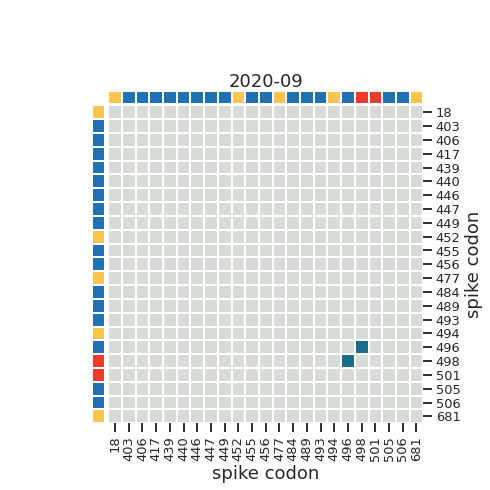

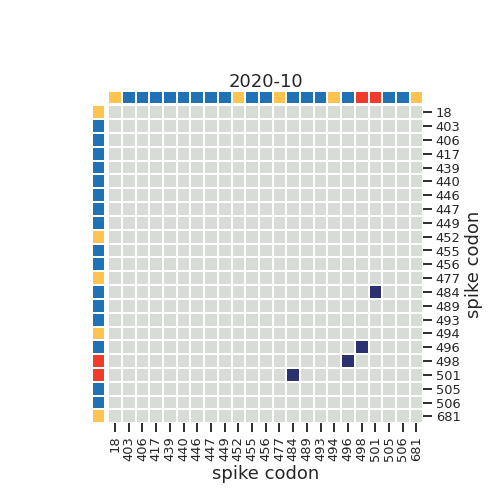

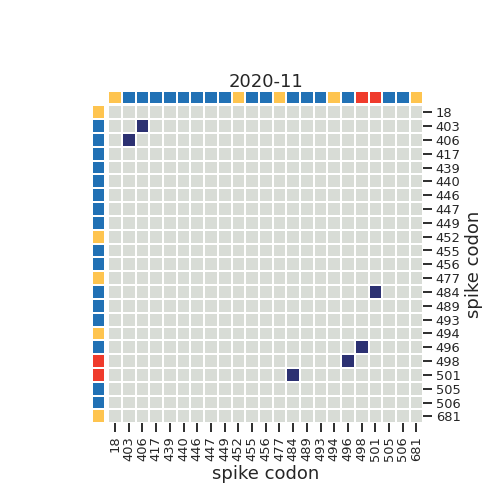

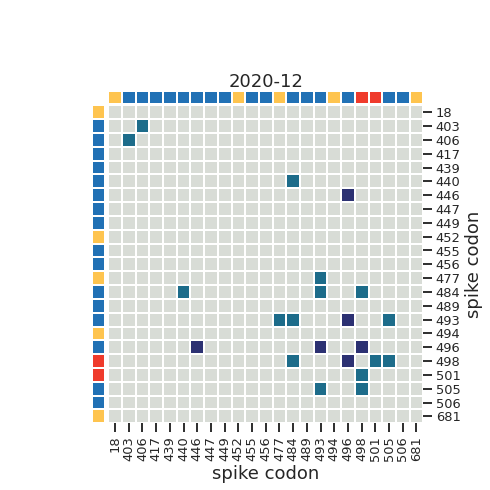

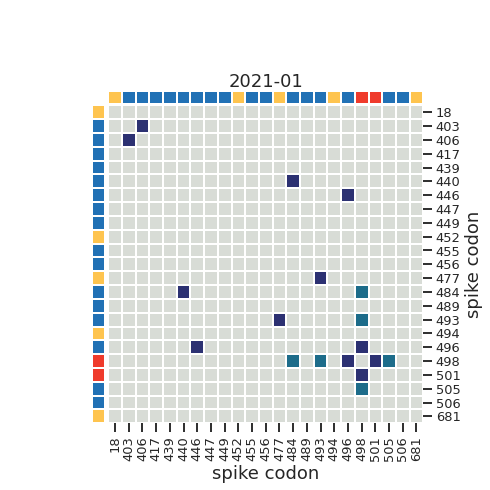

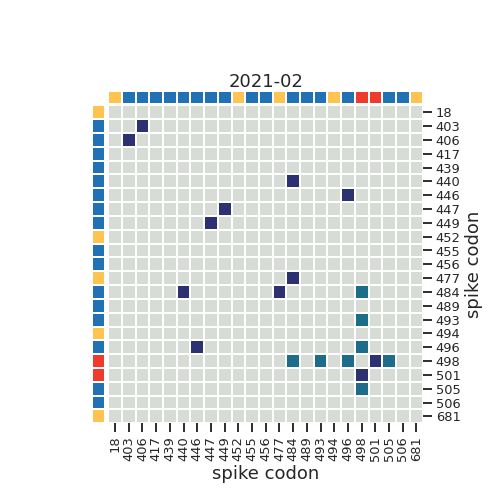

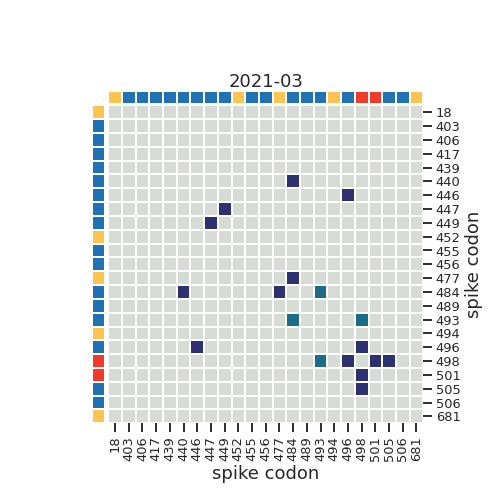

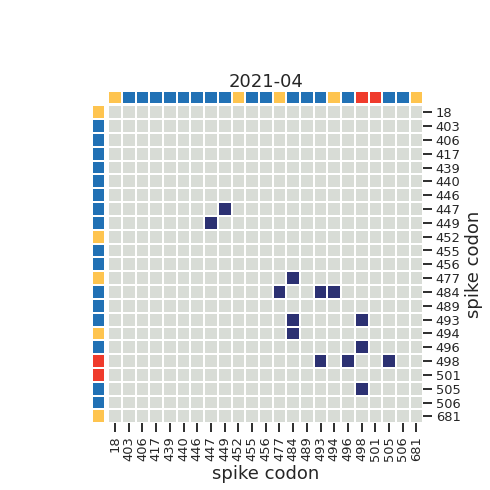

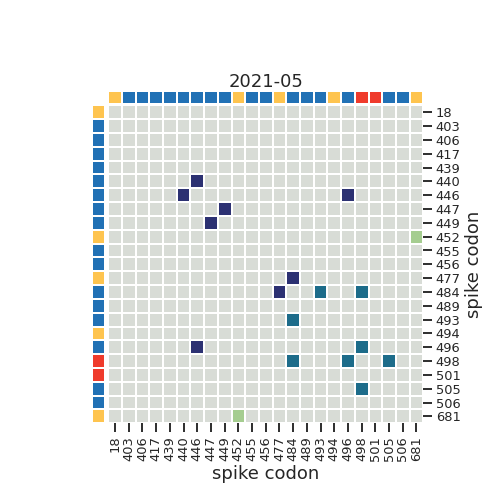

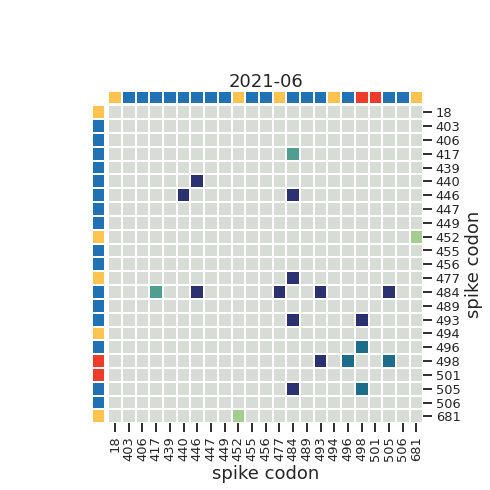

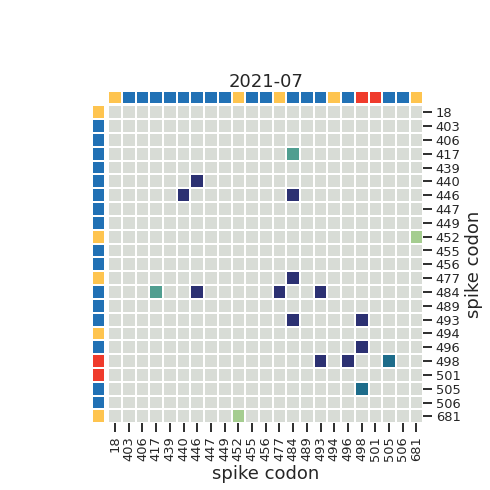

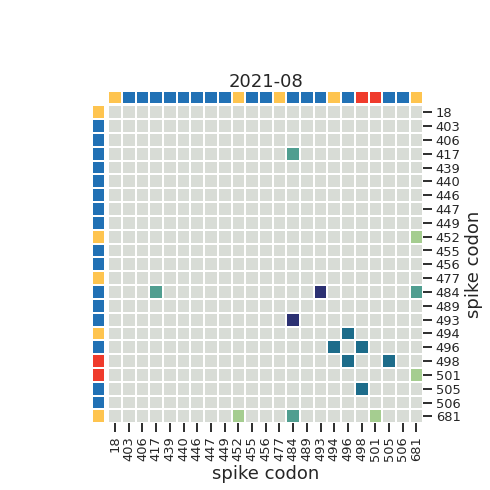

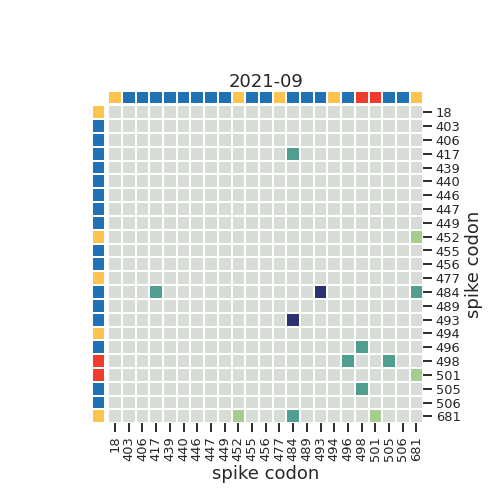

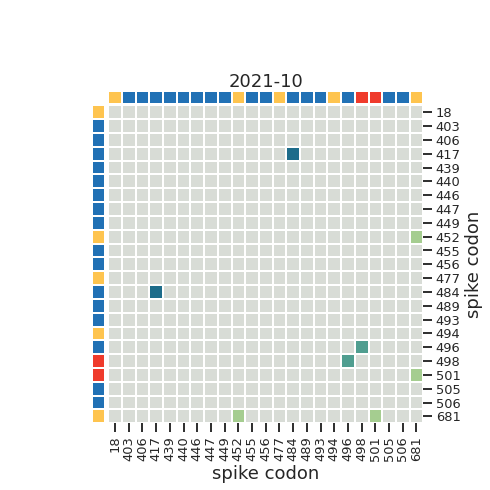

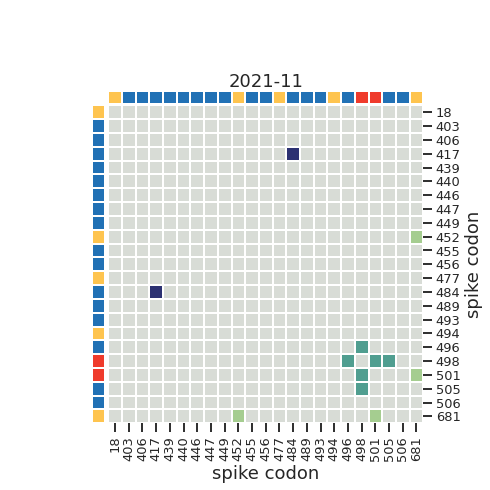

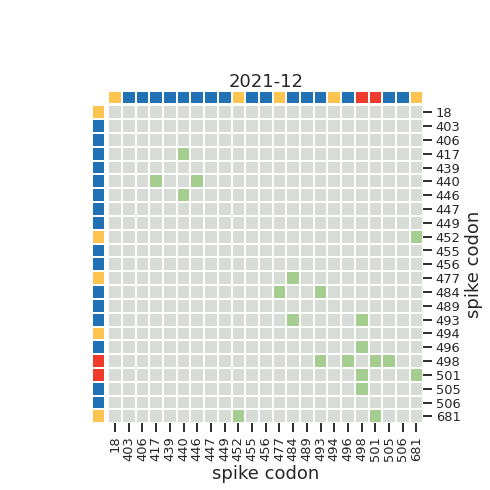

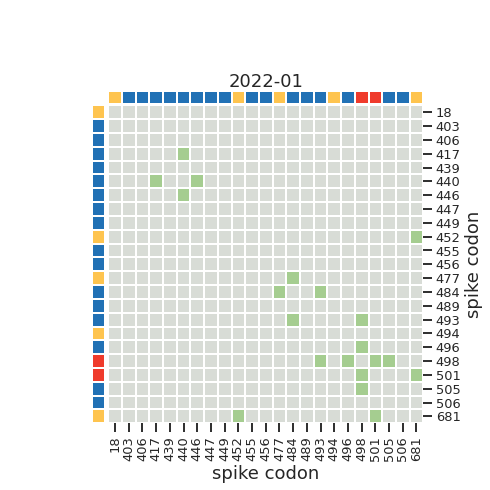

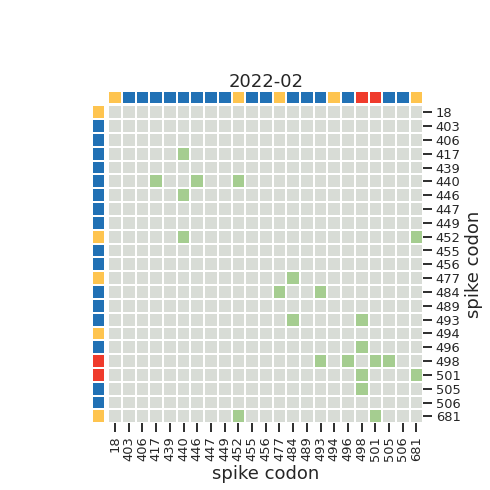

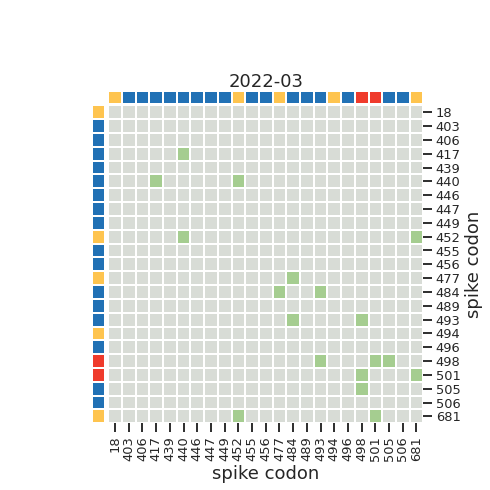

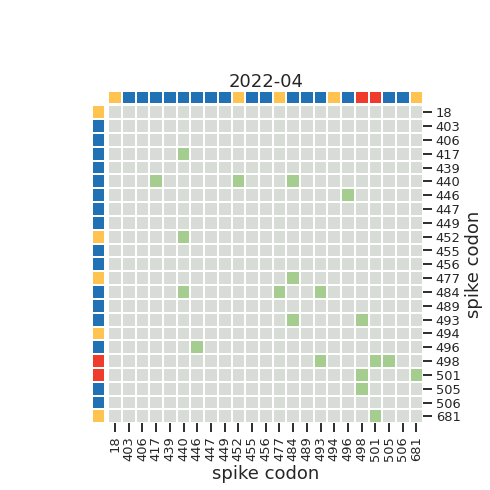

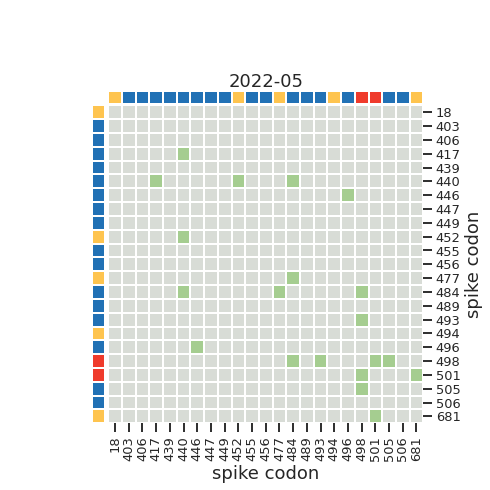

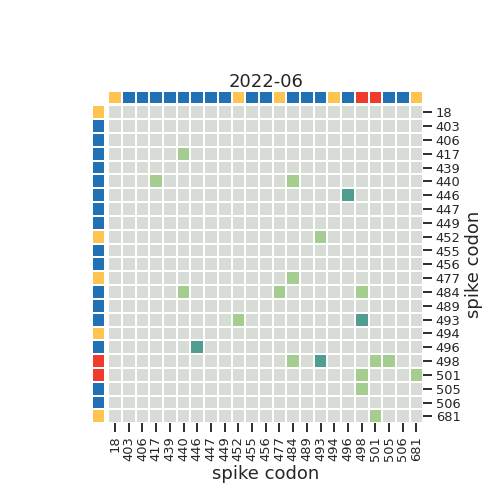

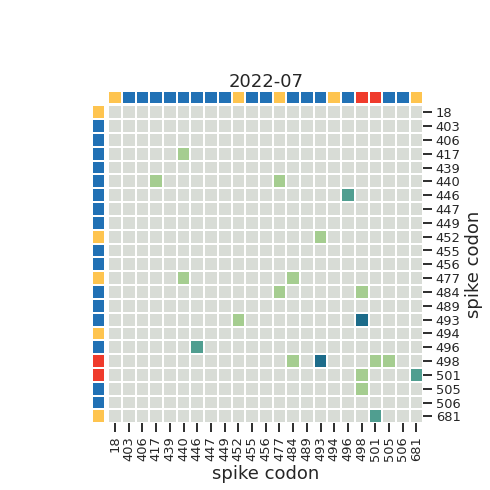

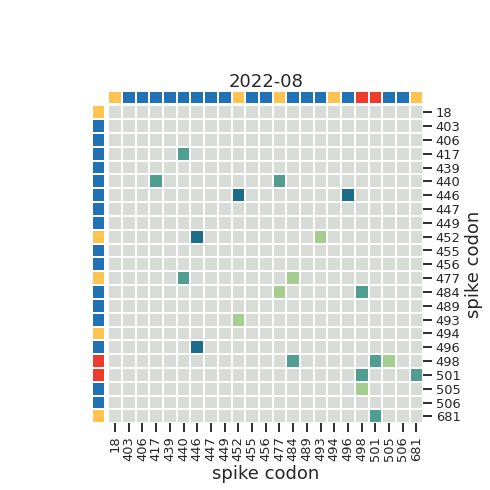

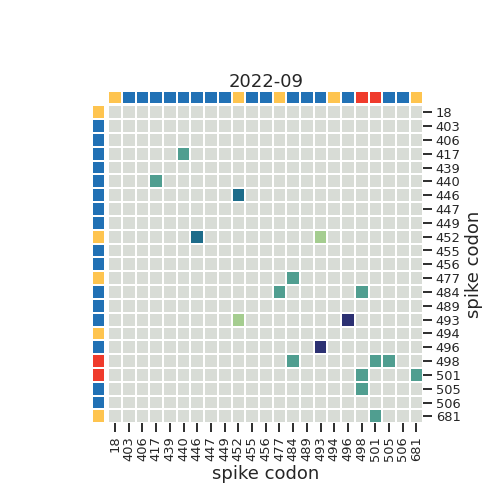

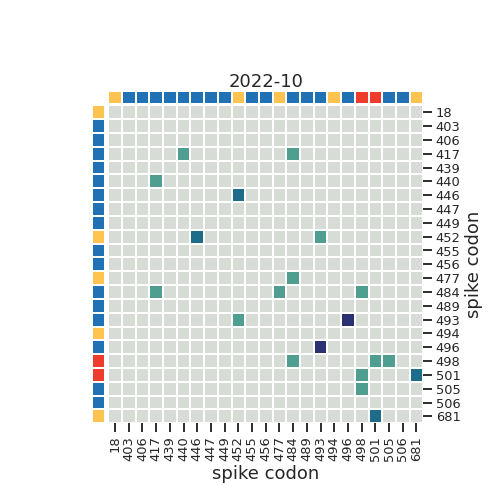

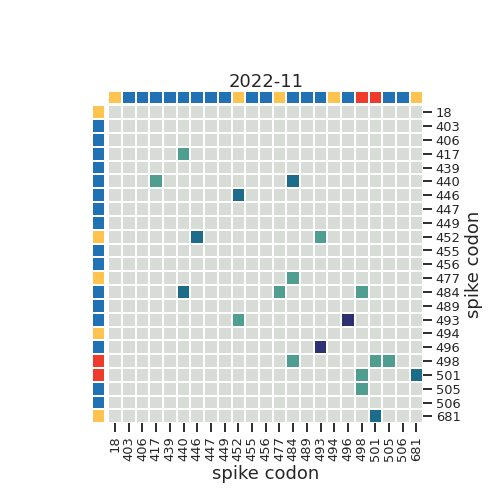

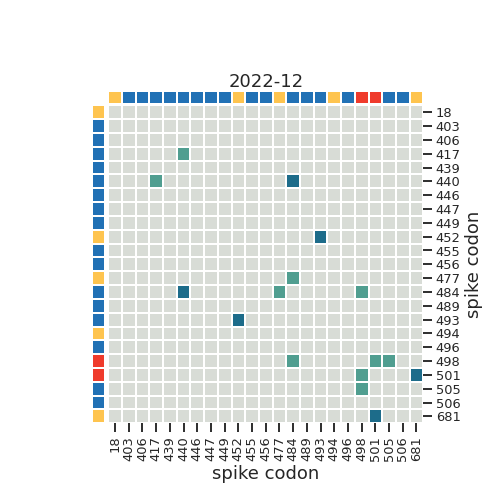

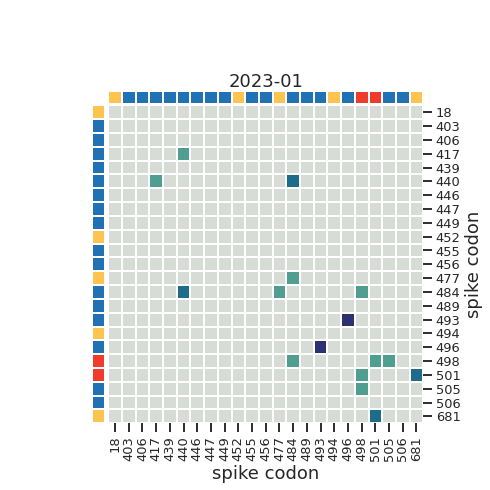

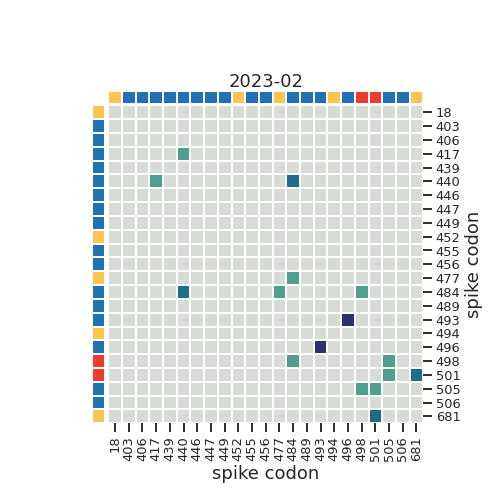

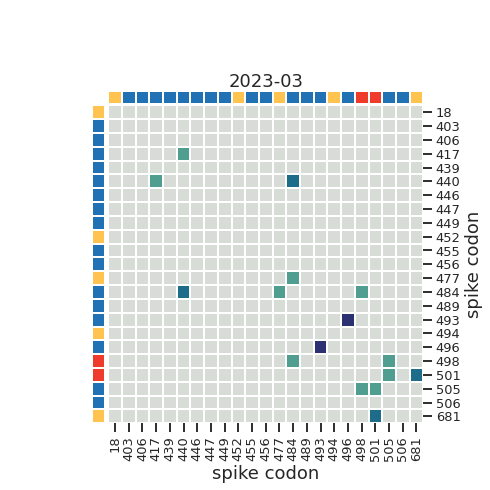

In [12]:
for date in sorted(s['name'].unique()):
    plot_mi(s, date)